# 1.0 Collecting Data through API

In [1]:
#All the imports
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
from tweepy import *
import os
from dotenv import load_dotenv,find_dotenv
import pandas as pd
import numpy as np
from langdetect import detect

Downloaded data multiple times throught the API for different companies: Wendys, Google, Nasa, Spacex, Microsoft, Dominoes, Mcdonalds (these were identified as some of the most popular ones). It seems the limit was 200 rows per query. The csv files with the data were saved of each company then combined in the end as a single dataframe for analysis. It would be good to have a great variety to have the model train better.

In [2]:
# Adding API and secret
consumer_key = os.getenv('API_KEY')
consumer_secret = os.getenv('API_SECRET')
access_token = os.getenv('TOKEN')
access_token_secret = os.getenv('TOKEN_SECRET')

# Authenticating on the twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

'''Getting the data'''
# Get the tweets from Twitter accounts
tweets = api.user_timeline(screen_name='Mcdonalds', count=900)

In [3]:
# Create empty lists to store the data along the line
ids = []
texts = []
dates = []
likes = []
retweets = []

# Iterate over the tweets and store the data
for tweet in tweets:
    ids.append(tweet.id)
    texts.append(tweet.text)
    dates.append(tweet.created_at)
    likes.append(tweet.favorite_count)
    retweets.append(tweet.retweet_count)

# Create dataframes to store the data
df = pd.DataFrame({'id': ids, 
                   'text': texts,
                  'date':dates,
                  'likes':likes,
                  'retweets':retweets})

In [4]:
df.head()

,id,text,date,likes,retweets
0,1623718563302318086,@rikkitae we always want your order to be 100%...,2023-02-09 16:20:47+00:00,0,0
1,1623717599430299650,@IceyTea__ we'd like to look into this for you...,2023-02-09 16:16:57+00:00,0,0
2,1623715213471096834,@_mp13_ prices are subject to change based on ...,2023-02-09 16:07:28+00:00,0,0
3,1623715003604910080,@AtlasXIV that's definitely not how we roll as...,2023-02-09 16:06:38+00:00,0,0
4,1623712961184374786,@zaysworst our World Famous Fries should never...,2023-02-09 15:58:31+00:00,0,0


Spacex has a lot of tweets in a different language to english. This needs to be fixed as the ML is done on english words.

In [5]:
df['Sentiment_score'] = df['text']
df.head()

,id,text,date,likes,retweets,Sentiment_score
0,1623718563302318086,@rikkitae we always want your order to be 100%...,2023-02-09 16:20:47+00:00,0,0,@rikkitae we always want your order to be 100%...
1,1623717599430299650,@IceyTea__ we'd like to look into this for you...,2023-02-09 16:16:57+00:00,0,0,@IceyTea__ we'd like to look into this for you...
2,1623715213471096834,@_mp13_ prices are subject to change based on ...,2023-02-09 16:07:28+00:00,0,0,@_mp13_ prices are subject to change based on ...
3,1623715003604910080,@AtlasXIV that's definitely not how we roll as...,2023-02-09 16:06:38+00:00,0,0,@AtlasXIV that's definitely not how we roll as...
4,1623712961184374786,@zaysworst our World Famous Fries should never...,2023-02-09 15:58:31+00:00,0,0,@zaysworst our World Famous Fries should never...


In [6]:
#Defining a function to apply sentiment analysis
def sentiment_evaluation(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_object = SentimentIntensityAnalyzer()

    sentiment_diction = sid_object.polarity_scores(sentence)
 
    # decide sentiment as positive, negative and neutral
    if sentiment_diction['compound'] >= 0.05:
        return "Positive"
 
    elif sentiment_diction['compound'] <= - 0.05 :
        return "Negative"
 
    else:
         return "Neutral"

In [7]:
#Applying text blob to get rid of non-english tweets in SpaceX data
#df['language'] = df['Sentiment_score'].apply(detect)
#df.head()

In [8]:
#Dropping all non-english rows
#df = df[df["language"].str.contains("en") == True]
#df 

In [9]:
#Applying sentiment analysis to the tweet text
df['Sentiment_score'] = df['Sentiment_score'].transform(sentiment_evaluation)

In [10]:
pd.options.display.max_colwidth=200
pd.options.display.max_rows=100
df

,id,text,date,likes,retweets,Sentiment_score
0,1623718563302318086,"@rikkitae we always want your order to be 100% accurate, Rikki. connect with us here: https://t.co/MOjDkbDTZR",2023-02-09 16:20:47+00:00,0,0,Positive
1,1623717599430299650,@IceyTea__ we'd like to look into this for you. do share more info here: https://t.co/MOjDkbDTZR,2023-02-09 16:16:57+00:00,0,0,Positive
2,1623715213471096834,"@_mp13_ prices are subject to change based on location and food costs, Maddie. you can still download our McDonald'… https://t.co/fT9pc53uzN",2023-02-09 16:07:28+00:00,0,0,Neutral
3,1623715003604910080,"@AtlasXIV that's definitely not how we roll as order accuracy is essential, Atlas. share more details here: https://t.co/MOjDkbDTZR",2023-02-09 16:06:38+00:00,0,0,Positive
4,1623712961184374786,@zaysworst our World Famous Fries should never disappoint you. do talk to us here: https://t.co/MOjDkbDTZR,2023-02-09 15:58:31+00:00,0,0,Positive
...,...,...,...,...,...,...
195,1623342244416593922,"@Queen_Kaci we always want your order to be on point, Kaci. let's connect here: https://t.co/MOjDkbDTZR",2023-02-08 15:25:25+00:00,0,0,Positive
196,1623342181510512640,"@JakksonWolfe menu item availability depends on the individual restaurant, Mark. we recommend you to check with oth… https://t.co/kQrtb3udzr",2023-02-08 15:25:10+00:00,1,0,Positive
197,1623340335333081089,@muymalapalabra we hate to let you down! connect with us here:\nhttps://t.co/MOjDkbDTZR,2023-02-08 15:17:50+00:00,0,0,Negative
198,1623333569413226497,@TOEGOTTI prices are up to the restaurant owner to decide. location and food costs cause prices to vary. download t… https://t.co/3tjCmSJHbq,2023-02-08 14:50:57+00:00,0,0,Neutral


In [11]:
df['Sentiment_score'].value_counts()

Positive    133
Neutral      49
Negative     18
Name: Sentiment_score, dtype: int64

In [12]:
#df.to_csv('Mcdonalds_twitter.csv', index=False)

# 2.0 ML

In [32]:
#Importing necessary libraries

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## 2.1 Pre-processing

In [14]:
df2 = pd.read_csv('All_twitter.csv')

In [15]:
#Label-encoding the sentiment score

df2['Sentiment_encoded'] = df2['Sentiment_score']

label_encoder = LabelEncoder()
df2['Sentiment_encoded'] = label_encoder.fit_transform(df2['Sentiment_encoded'])
df2

,id,text,date,likes,retweets,Sentiment_score,Sentiment_encoded
0,1.620000e+18,@BvsNARD Oh no! Please DM us your email address so we can make this right. Thanks!,2023-02-09 01:35:58+00:00,0,0,Positive,2
1,1.620000e+18,@AndrewFnWheeler Oh no! Please DM us your email address so we can make this right. Thanks!,2023-02-09 01:35:31+00:00,0,0,Positive,2
2,1.620000e+18,@empresss_j Oh no! Please DM us the restaurant location and your email address so we can make this right. Thanks!,2023-02-09 01:35:15+00:00,0,0,Positive,2
3,1.620000e+18,@buckymalone703 Hard to argue,2023-02-07 16:25:33+00:00,3,1,Negative,0
4,1.620000e+18,@ceespejel 👀👀👀👀👀👀👀,2023-02-07 03:11:44+00:00,5,0,Neutral,1
...,...,...,...,...,...,...,...
1394,1.603540e+18,@MayAlhajri2 Chip! 😍,2022-12-15 23:58:21+00:00,1,0,Positive,2
1395,1.603540e+18,@JenMsft Too real. 😂,2022-12-15 23:56:42+00:00,14,1,Positive,2
1396,1.603540e+18,"RT @MicrosoftDesign: In our latest #UX film 🎬, our in-house motion team explores the new macro interactions alongside the new look + feel f…",2022-12-15 23:55:23+00:00,0,169,Neutral,1
1397,1.603520e+18,"With AI, Microsoft products power billions of intelligent experiences every day. \n\nNow, you can write code, create… https://t.co/Irb3R4T1z2",2022-12-15 22:35:52+00:00,177,34,Positive,2


In [16]:
df2['Sentiment_encoded'].value_counts()

2    684
1    583
0    132
Name: Sentiment_encoded, dtype: int64

In [17]:
#Preprocessing tweets
def process_tweet(text):
    text = str(text).lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

In [18]:
#Pre-processing the tweets

df2["clean_text"] = df2.text.map(process_tweet)
df2.head()

,id,text,date,likes,retweets,Sentiment_score,Sentiment_encoded,clean_text
0,1.620000e+18,@BvsNARD Oh no! Please DM us your email address so we can make this right. Thanks!,2023-02-09 01:35:58+00:00,0,0,Positive,2,bvsnard oh no please dm us your email address so we can make this right thanks
1,1.620000e+18,@AndrewFnWheeler Oh no! Please DM us your email address so we can make this right. Thanks!,2023-02-09 01:35:31+00:00,0,0,Positive,2,andrewfnwheeler oh no please dm us your email address so we can make this right thanks
2,1.620000e+18,@empresss_j Oh no! Please DM us the restaurant location and your email address so we can make this right. Thanks!,2023-02-09 01:35:15+00:00,0,0,Positive,2,empresss j oh no please dm us the restaurant location and your email address so we can make this right thanks
3,1.620000e+18,@buckymalone703 Hard to argue,2023-02-07 16:25:33+00:00,3,1,Negative,0,buckymalone703 hard to argue
4,1.620000e+18,@ceespejel 👀👀👀👀👀👀👀,2023-02-07 03:11:44+00:00,5,0,Neutral,1,ceespejel 👀👀👀👀👀👀👀


In [19]:
#Defining dataframes for each category
df_positive = df2[df2.Sentiment_encoded == 2]
df_neutral = df2[df2.Sentiment_encoded == 1]
df_negative = df2[df2.Sentiment_encoded == 0]

In [20]:
#Undersampling to balance the dataset
df_positive = df_positive.sample(n=len(df_negative), random_state=101)
df_neutral = df_neutral.sample(n=len(df_negative), random_state=101)
df_balanced = pd.concat([df_negative, df_neutral,df_positive],axis=0)
df_balanced['Sentiment_score'].value_counts()

Negative    132
Neutral     132
Positive    132
Name: Sentiment_score, dtype: int64

In [21]:
#Shuffling data and resetting the index
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

df_balanced

,id,text,date,likes,retweets,Sentiment_score,Sentiment_encoded,clean_text
0,1.620000e+18,New T-0 of 4:32 a.m. ET for this morning’s Falcon 9 launch of Starlink; weather is 70% favorable for liftoff,2023-01-26 08:40:46+00:00,2864,302,Positive,2,new t 0 of 4 32 a m et for this morning’s falcon 9 launch of starlink weather is 70 favorable for liftoff
1,1.620000e+18,@Millions I'm just reading.,2023-02-01 17:08:09+00:00,408,1,Neutral,1,millions i m just reading
2,1.623610e+18,@diannasff we'd like to know more about this. talk to us here: https://t.co/MOjDkbDTZR,2023-02-09 09:11:14+00:00,0,0,Positive,2,diannasff we d like to know more about this talk to us here https t co mojdkbdtzr
3,1.620000e+18,"@QuDeuce Hi, Qudeuce. You can see the participants in a meeting by following these steps: In the upper left corner,… https://t.co/1A7uSBQXVt",2023-02-08 10:39:18+00:00,1,0,Neutral,1,qudeuce hi qudeuce you can see the participants in a meeting by following these steps in the upper left corner … https t co 1a7usbqxvt
4,1.610000e+18,Falcon 9 launches SpaceX’s sixth dedicated smallsat rideshare mission – completing our 200th successful launch! https://t.co/SIaypHsMur,2023-01-03 20:30:22+00:00,12589,1317,Positive,2,falcon 9 launches spacex’s sixth dedicated smallsat rideshare mission – completing our 200th successful launch https t co siayphsmur
...,...,...,...,...,...,...,...,...
391,1.620000e+18,@Biswaji50827917 Hi Biswajit. We'd like to move this conversation to DM. Please follow us and let us know when you… https://t.co/42R9maLZ3I,2023-02-07 05:10:14+00:00,0,0,Positive,2,biswaji50827917 hi biswajit we d like to move this conversation to dm please follow us and let us know when you… https t co 42r9malz3i
392,1.600000e+18,Watch Falcon 9 launch the @SES_Satellites O3b mPOWER mission to orbit → https://t.co/bJFjLCzWdK https://t.co/SqeA1SSTsu,2022-12-16 22:35:51+00:00,3751,685,Neutral,1,watch falcon 9 launch the ses satellites o3b mpower mission to orbit → https t co bjfjlczwdk https t co sqea1sstsu
393,1.620000e+18,@nicnacpattiwac6 @JKillJagSwag904 Nothing but respect for a quality baked potato,2023-01-22 18:55:37+00:00,2060,42,Negative,0,nicnacpattiwac6 jkilljagswag904 nothing but respect for a quality baked potato
394,1.620000e+18,@CSEH3C4R Hi there. We'd like to move this conversation to DM. Please follow us and let us know when you have so we can share next steps.,2023-02-08 08:04:25+00:00,1,0,Positive,2,cseh3c4r hi there we d like to move this conversation to dm please follow us and let us know when you have so we can share next steps


In [40]:
#Defining the target and training features

X = df2.iloc[:, 7] #training feature, the text of the tweet
y = df2.iloc[:, 6] #target feature, the sentiment evaluation score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Turning text into numerical features
vec = CountVectorizer(
    ngram_range=(1, 3), 
    stop_words="english",
)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)


In [25]:
#print(X_train)

### 2.2.1 Naive Bayes Classifier

In [43]:
#Training the model and predicting
nb = MultinomialNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        30
           1       0.72      0.65      0.68       111
           2       0.68      0.85      0.76       139

    accuracy                           0.70       280
   macro avg       0.80      0.58      0.61       280
weighted avg       0.73      0.70      0.69       280



[[  7   7  16]
 [  0  72  39]
 [  0  21 118]]


<AxesSubplot:>

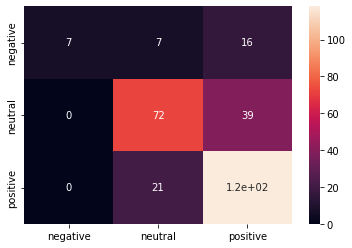

In [44]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])

### 2.2.2 Random Forest

In [45]:
# Training and predicting

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

predictions_forest = forest_model.predict(X_test)

print(classification_report(y_test, predictions_forest))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        30
           1       0.60      0.91      0.73       111
           2       0.83      0.64      0.72       139

    accuracy                           0.70       280
   macro avg       0.81      0.58      0.59       280
weighted avg       0.76      0.70      0.68       280



[[  6  16   8]
 [  0 101  10]
 [  0  50  89]]


<AxesSubplot:>

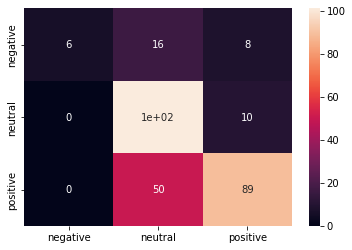

In [46]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_forest)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])

### 2.2.3 Logistic Regression

In [47]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [48]:
predictions_logr = logr.predict(X_test)
print(classification_report(y_test, predictions_logr))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42        30
           1       0.64      0.86      0.73       111
           2       0.80      0.70      0.75       139

    accuracy                           0.72       280
   macro avg       0.81      0.61      0.63       280
weighted avg       0.76      0.72      0.71       280



[[ 8 13  9]
 [ 0 96 15]
 [ 0 42 97]]


<AxesSubplot:>

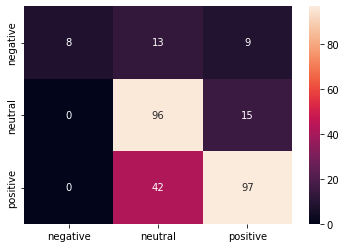

In [49]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_logr)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])